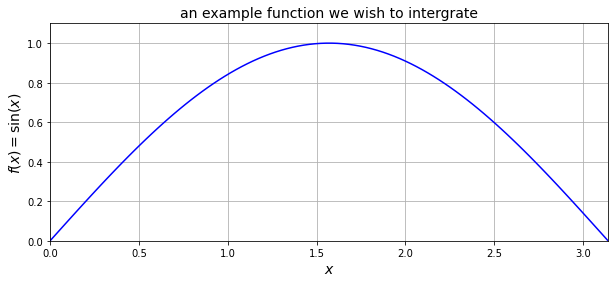

In [29]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,4))
ax1 = plt.subplot(111)

x = np.linspace(0, np.pi, 100)
y = np.sin(x)

ax1.plot(x,y,"b")
ax1.set_xlim([0, np.pi])
ax1.set_ylim([0, 1.1])

ax1.set_xlabel("$x$", fontsize=14)
ax1.set_ylabel("$f(x)=\sin(x)$", fontsize=14)
ax1.set_title("an example function we wish to intergrate", fontsize=14)
ax1.grid(True)
plt.show()


In [30]:
from matplotlib.patches import Rectangle
def f(x):
    return np.sin(x)

x = np.linspace(0,np.pi, 100)
y = f(x)

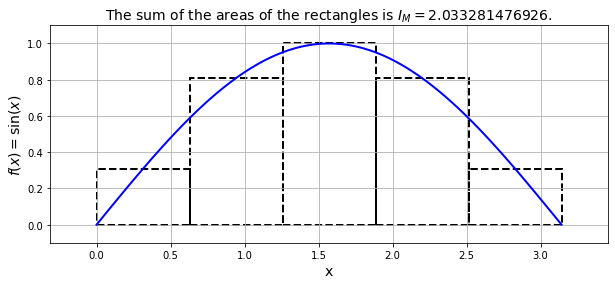

In [31]:
fig = plt.figure(figsize=(10,4))
ax1 = plt.subplot(111)
ax1.plot(x, y, "b", lw=2)
ax1.margins(0.1)

ax1.set_xlabel("x", fontsize=14)
ax1.set_ylabel("$f(x)=\sin(x)$", fontsize=14)
ax1.grid(True)

number_intervals = 5
xi = np.linspace(0,np.pi, number_intervals+1)
I_M = 0.0
for i in range(number_intervals):
    ax1.add_patch(Rectangle((xi[i],0.0), (xi[i+1] - xi[i]),
                            f((xi[i+1]+ xi[i])/2), fill=False, 
                            ls="--", color="k", lw=2))
    I_M += f((xi[i+1]+xi[i])/2) * (xi[i+1]-xi[i]) 
ax1.set_title("The sum of the areas of the rectangles is $I_M=${:.12f}.".format(I_M),
                fontsize=14)
plt.show()

In [32]:
def midpoint_rule(a,b,function, number_intervals=10):
    interval_size = (b-a)/number_intervals
    assert interval_size > 0
    assert type(number_intervals)  == int
    I_M = 0.0
    mid = a + (interval_size/2.0)
    while (mid<b):
        I_M += interval_size * function(mid)
        mid += interval_size
    return I_M

In [33]:
print("midpoint_rule(0,np.pi, np.sin, number_intervals=5) =", midpoint_rule(0,np.pi, np.sin, number_intervals=5))


midpoint_rule(0,np.pi, np.sin, number_intervals=5) = 2.033281476926104


In [34]:
print("the exact area found by direct intergration = 2 ")
for i in (1,2,10,100,1000):
    area = midpoint_rule(0, np.pi, np.sin, i)
    print("area %g rectangle(s) = %g (error=%g)" %(i,area,abs(area-2)))

the exact area found by direct intergration = 2 
area 1 rectangle(s) = 3.14159 (error=1.14159)
area 2 rectangle(s) = 2.22144 (error=0.221441)
area 10 rectangle(s) = 2.00825 (error=0.00824841)
area 100 rectangle(s) = 2.00008 (error=8.22491e-05)
area 1000 rectangle(s) = 2 (error=8.22467e-07)


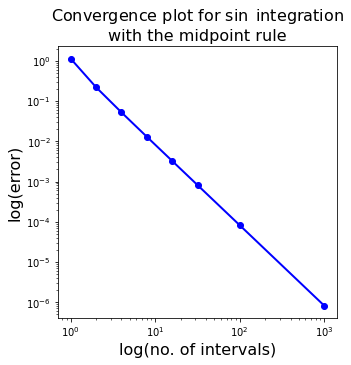

In [35]:
interval_size_M = [1,2,4,8,16,32,100,1000]
errors_M = np.zeros_like(interval_size_M, dtype='float64')

for (i,number_intervals) in enumerate(interval_size_M):
    area = midpoint_rule(0, np.pi, f, number_intervals)
    errors_M[i] = abs(area-2)

fig = plt.figure(figsize=(5,5))
ax1 = plt.subplot(111)
ax1.loglog(interval_size_M, errors_M, 'bo-', lw=2)
ax1.set_xlabel("log(no. of intervals)", fontsize=16)
ax1.set_ylabel("log(error)", fontsize=16)
ax1.set_title("Convergence plot for $\sin$ integration\nwith the midpoint rule",
                fontsize=16)
from myst_nb import glue
glue("midpoint_conv_fig", fig, display=False)
plt.show()

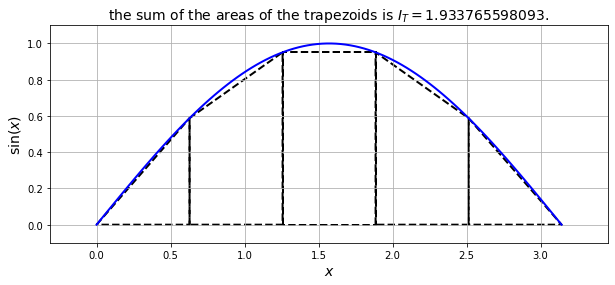

In [36]:
from matplotlib.patches import Polygon
x = np.linspace(0,np.pi,100)
y = f(x)
fig = plt.figure(figsize=(10,4))
ax1 = plt.subplot(111)
ax1.plot(x,y,'b',lw=2)
ax1.margins(0.1)

ax1.set_xlabel('$x$',fontsize=14)
ax1.set_ylabel("$\sin(x)$",fontsize=14)
ax1.set_title("Approximating function with trapezoids", fontsize=14)
ax1.grid(True)

number_intervals = 5
xi = np.linspace(0, np.pi, number_intervals+1)
I_T = 0.0
for i in range(number_intervals):
    ax1.add_patch(Polygon(np.array([[xi[i],0], [xi[i], f(xi[i])],
                [xi[i+1], f(xi[i+1])], [xi[i+1],0]]), 
                closed=True, fill=False,ls='--',color='k',lw=2))
    I_T += ((f(xi[i+1]) + f(xi[i]))/2) * (xi[i+1] - xi[i])
ax1.set_title("the sum of the areas of the trapezoids is $I_T=${:.12f}."
                .format(I_T),fontsize=14)
plt.show()

In [37]:
def trapezoidal_rule(a, b, function, number_intervals=10):
    interval_size = (b-a)/ number_intervals
    assert interval_size >0
    assert type(number_intervals) == int
    I_T = 0.0
    for i in range(number_intervals):
        this_bin_start = a + (interval_size * i)
        I_T += interval_size * \
            (function(this_bin_start)+ function(this_bin_start + interval_size))/2.0
    return I_T

In [38]:
print("The exact area found by direct integration = 2")
for i in (1,2,10,100,1000):
    area = trapezoidal_rule(0, np.pi, np.sin, i)
    print("Area %g trapezoid(s)=%g(error=%g)"%(i,area,abs(area-2)))
    

The exact area found by direct integration = 2
Area 1 trapezoid(s)=1.92367e-16(error=2)
Area 2 trapezoid(s)=1.5708(error=0.429204)
Area 10 trapezoid(s)=1.98352(error=0.0164765)
Area 100 trapezoid(s)=1.99984(error=0.000164496)
Area 1000 trapezoid(s)=2(error=1.64493e-06)


Simpson's rule

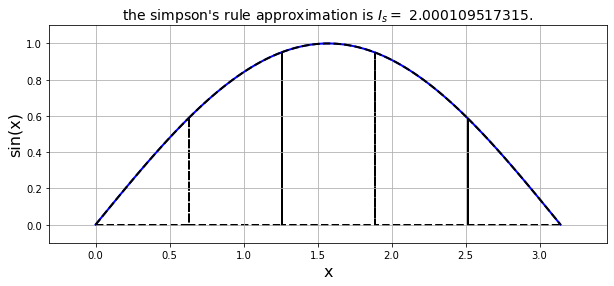

In [39]:
x = np.linspace(0,np.pi, 100)
y = f(x)

fig = plt.figure(figsize=(10,4))
ax1 = plt.subplot(111)
ax1.plot(x,y,'b',lw=2)
ax1.margins(0.1)

ax1.set_xlabel('x', fontsize=16)
ax1.set_ylabel('sin(x)', fontsize=16)
ax1.grid(True)

number_intervals = 5
xi = np.linspace(0,np.pi, number_intervals+1)
I_S = 0.0

for i in range(number_intervals):
    ax1.add_patch(Polygon(np.array([[xi[i],f(xi[i])],[xi[i],0],[xi[i+1],0],[xi[i+1],f(xi[i+1])]]),
            closed=False, fill=False, ls='--',color='k',lw=2))
    poly_coeff = np.polyfit((xi[i],(xi[i+1]+xi[i])/2, xi[i+1]),
            (f(xi[i]),f((xi[i+1]+xi[i])/2), f(xi[i+1])) ,2)
    ax1.plot(np.linspace(xi[i],xi[i+1],20), f(np.linspace(xi[i],xi[i+1],20)),
            ls='--',color='k',lw=2)
    I_S += ((xi[i+1]-xi[i])/6.) * (f(xi[i]) + 4* f((xi[i+1]+xi[i])/2.0) + f(xi[i+1]))
ax1.set_title("the simpson's rule approximation is $I_s =$ {:.12f}."
            .format(I_S), fontsize=14)
plt.show()



In [40]:
def simpsons_rule(a,b,function, number_intervals=10):
    interval_size = (b-a) / number_intervals
    assert interval_size > 0
    assert type(number_intervals) == int
    I_S = 0.0
    for i in range(number_intervals):
        this_bin_start = a + interval_size * (i)
        this_bin_mid = this_bin_start + interval_size /2
        this_bin_end = this_bin_start + interval_size
        I_S += (interval_size/6) * (function(this_bin_start)+
            4*function(this_bin_mid) + function(this_bin_end))
    return I_S

In [41]:
print('The area found by direct intergration =2')
for i in (1,2,10,100,1000):
    area = simpsons_rule(0, np.pi, np.sin, i)
    print("area %g Simpson's interval=%g (error=%g)" %(i,area,abs(area-2)))

The area found by direct intergration =2
area 1 Simpson's interval=2.0944 (error=0.0943951)
area 2 Simpson's interval=2.00456 (error=0.00455975)
area 10 Simpson's interval=2.00001 (error=6.78444e-06)
area 100 Simpson's interval=2 (error=6.76471e-10)
area 1000 Simpson's interval=2 (error=6.79456e-14)


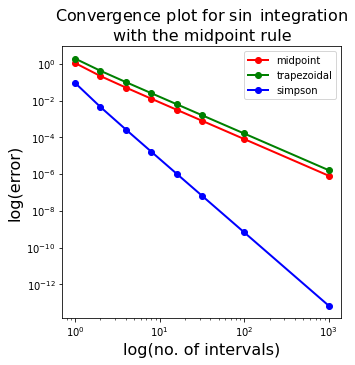

In [46]:
interval_size_M = [1,2,4,8,16,32,100,1000]
errors_M = np.zeros_like(interval_size_M, dtype='float64')
errors_T = np.zeros_like(interval_size_M, dtype='float64')
errors_S = np.zeros_like(interval_size_M, dtype='float64')

for (i,number_intervals) in enumerate(interval_size_M):
    area_M = midpoint_rule(0, np.pi, f, number_intervals)
    errors_M[i] = abs(area_M-2)
    area_T = trapezoidal_rule(0, np.pi, f, number_intervals)
    errors_T[i]= abs(area_T-2)
    area_S = simpsons_rule(0, np.pi, f, number_intervals)
    errors_S[i] = abs(area_S-2)

fig = plt.figure(figsize=(5,5))
ax1 = plt.subplot(111)

ax1.loglog(interval_size_M, errors_M, 'ro-', lw=2, label='midpoint')
ax1.loglog(interval_size_M, errors_T, 'go-', lw=2,label='trapezoidal')
ax1.loglog(interval_size_M, errors_S, 'bo-', lw=2,label='simpson')

ax1.set_xlabel("log(no. of intervals)", fontsize=16)
ax1.set_ylabel("log(error)", fontsize=16)
ax1.set_title("Convergence plot for $\sin$ integration\nwith the midpoint rule",
                fontsize=16)
ax1.legend(loc='best')
from myst_nb import glue
glue("midpoint_conv_fig", fig, display=False)
plt.show()

In [47]:
def simpsons_composite_rule(a,b,function, number_intervals=10):
    assert number_intervals % 2 ==0
    interval_size = (b-a) / number_intervals
    I_cS2 = function(a) + function(b)
    for i in range(1,number_intervals,2):
        I_cS2 += 4 * function(a + i*interval_size)
    for i in range(2, number_intervals-1, 2):
        I_cS2 += 2 * function(a + i * interval_size)
    return I_cS2 * (interval_size / 3)

In [48]:
print('the area found by direct intergration =2')
for i in (2,10,100,1000):
    area = simpsons_composite_rule(0, np.pi, np.sin, i)
    print("area %g rectangle(s) =%g (error=%g)"%(i,area,abs(area-2)))

the area found by direct intergration =2
area 2 rectangle(s) =2.0944 (error=0.0943951)
area 10 rectangle(s) =2.00011 (error=0.000109517)
area 100 rectangle(s) =2 (error=1.08245e-08)
area 1000 rectangle(s) =2 (error=1.07869e-12)


In [49]:
def weddles_rule(a,b,function,number_intervals):
    S = simpsons_composite_rule(a,b,function, number_intervals)
    S2 = simpsons_composite_rule(a,b,function, number_intervals*2)
    return S2 + (S2-S)/15

In [50]:
for i in (2,10,100,1000):
    area = weddles_rule(0,np.pi, np.sin, i)
    print("Area with %g Weddle's interval(s) = %g (error=%g)"%(i, area, abs(area-2)))
    

Area with 2 Weddle's interval(s) = 1.99857 (error=0.00142927)
Area with 10 Weddle's interval(s) = 2 (error=6.44164e-08)
Area with 100 Weddle's interval(s) = 2 (error=6.23945e-14)
Area with 1000 Weddle's interval(s) = 2 (error=8.88178e-16)


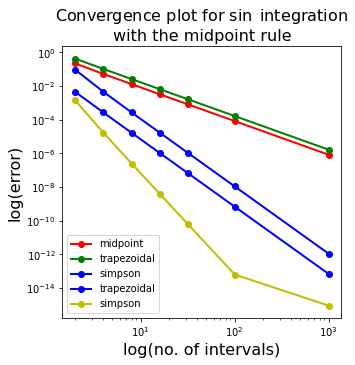

In [52]:
interval_size_M = [2,4,8,16,32,100,1000]
errors_M = np.zeros_like(interval_size_M, dtype='float64')
errors_T = np.zeros_like(interval_size_M, dtype='float64')
errors_S = np.zeros_like(interval_size_M, dtype='float64')
errors_SC = np.zeros_like(interval_size_M, dtype='float64')
errors_W = np.zeros_like(interval_size_M, dtype='float64')

for (i,number_intervals) in enumerate(interval_size_M):
    area_M = midpoint_rule(0, np.pi, f, number_intervals)
    errors_M[i] = abs(area_M-2)
    area_T = trapezoidal_rule(0, np.pi, f, number_intervals)
    errors_T[i]= abs(area_T-2)
    area_S = simpsons_rule(0, np.pi, f, number_intervals)
    errors_S[i] = abs(area_S-2)
    area_SC = simpsons_composite_rule(0, np.pi, f, number_intervals)
    errors_SC[i] = abs(area_SC-2)
    area_W = weddles_rule(0, np.pi, f, number_intervals)
    errors_W[i] = abs(area_W-2)

fig = plt.figure(figsize=(5,5))
ax1 = plt.subplot(111)

ax1.loglog(interval_size_M, errors_M, 'ro-', lw=2, label='midpoint')
ax1.loglog(interval_size_M, errors_T, 'go-', lw=2,label='trapezoidal')
ax1.loglog(interval_size_M, errors_S, 'bo-', lw=2,label='simpson')
ax1.loglog(interval_size_M, errors_SC, 'bo-', lw=2,label='trapezoidal')
ax1.loglog(interval_size_M, errors_W, 'yo-', lw=2,label='simpson')

ax1.set_xlabel("log(no. of intervals)", fontsize=16)
ax1.set_ylabel("log(error)", fontsize=16)
ax1.set_title("Convergence plot for $\sin$ integration\nwith the midpoint rule",
                fontsize=16)
ax1.legend(loc='best')
from myst_nb import glue
glue("midpoint_conv_fig", fig, display=False)
plt.show()